## Assignment week 05: Sleeping habits

Welcome to **week five** of this course programming 1. You will learn about analysing data with pandas and numpy and you will learn to visualize with bokeh. Concretely, you will preprocess the Sleep Study data in an appropiate format in order to conduct statistical and visual analysis. Learning outcomes:


## About the data

The data is collected from a survey-based study of the sleeping habits of individuals within the US. 

Below is a description of each of the variables contained within the dataset.

- Enough = Do you think that you get enough sleep?
- Hours = On average, how many hours of sleep do you get on a weeknight?
- PhoneReach = Do you sleep with your phone within arms reach?
- PhoneTime = Do you use your phone within 30 minutes of falling asleep?
- Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
- Breakfast = Do you typically eat breakfast?

The two research questions you should answer in this assignment are:
1. Is there a differences in Hours sleep caused by having breakfast (yes, no)?
2. Is there a differences in Hours sleep caused by having breakfast and the tireness (score)


The assignment consists of 6 parts:

- [part 1: load the data](#0)
- [part 2: data inspection](#1)
- [part 3: check assumptions](#2)
   - [check normality 3.1](#ex-31)
   - [check equal variance 3.2](#ex-32)
- [part 4: prepare the data](#3)
- [part 5: answer the research question](#4)
- [part 6: enhanced plotting](#5)

Part 1 till 5 are mandatory, part 6 is optional (bonus)
To pass the assingnment you need to a score of 60%. 


**NOTE If your project data is suitable you can use that data instead of the given data**

## ANOVA

Analysis of variance (ANOVA) compares the variances between groups versus within groups. It basically determines whether the differences between groups is larger than the differences within a group (the noise). 
A graph picturing this is as follow: https://link.springer.com/article/10.1007/s00424-019-02300-4/figures/2


In ANOVA, the dependent variable must be a continuous (interval or ratio) level of measurement. For instance Glucose level. The independent variables in ANOVA must be categorical (nominal or ordinal) variables. For instance trial category, time of day (AM versus PM) or time of trial (different categories). Like the t-test, ANOVA is also a parametric test and has some assumptions. ANOVA assumes that the data is normally distributed.  The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal. ANOVA also assumes that the observations are independent of each other. 

A one-way ANOVA has just one independent variable. A two-way ANOVA (are also called factorial ANOVA) refers to an ANOVA using two independent variables. For research question 1 we can use the one-way ANOVA, for research question two we can use two-way ANOVA. But first we need to check the assumptions. 


---

<a name='0'></a>
## Part 1: Load the data (10 pt)

load the `sleep.csv` data. Get yourself familiar with the data. Answer the following questions.

1. What is the percentage missing data?
2. Considering the research question, what is the dependent variable and what are the indepent variables? Are they of the correct datatype? 

In [1]:
import pandas as pd
import numpy as np
import panel as pn
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
sleep = pd.read_csv('sleep.csv')
sleep.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


In [3]:
#code printing percentage missing data
missing_values  = sleep.isnull().sum()
# print('There are two missing values!')
# print(missing_values)
dt_len = len(sleep.columns)*len(sleep)
percentage = (100*missing_values)/ dt_len
# print("The percentage of missing data is: {:.2f}%".format(percentage))
percentage

Enough        0.000000
Hours         0.320513
PhoneReach    0.000000
PhoneTime     0.000000
Tired         0.000000
Breakfast     0.000000
dtype: float64

In [4]:
sleep = sleep.dropna()
sleep = sleep.astype({'Hours': 'int64', 'Tired': 'category', 'Breakfast': 'category'})

In [5]:
#code printing answer dependent and independent variables
print('Indipendent variables:"breakfast" and "Tired"')
print('Dependent variables: "Hours"')

Indipendent variables:"breakfast" and "Tired"
Dependent variables: "Hours"


In [6]:
#code printing answer about datatypes
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Enough      102 non-null    object  
 1   Hours       102 non-null    int64   
 2   PhoneReach  102 non-null    object  
 3   PhoneTime   102 non-null    object  
 4   Tired       102 non-null    category
 5   Breakfast   102 non-null    category
dtypes: category(2), int64(1), object(3)
memory usage: 4.5+ KB


In [7]:
sleep.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8,Yes,Yes,3,Yes
1,No,6,Yes,Yes,3,No
2,Yes,6,Yes,Yes,2,Yes
3,No,7,Yes,Yes,4,No
4,No,7,Yes,Yes,2,Yes


---

<a name='1'></a>
## Part 2: Inspect the data (30 pt)

Inspect the data practically. Get an idea about how well the variable categories are ballanced. Are the values of a variable equally divided? What is the mean value of the dependent variable? Are there correlations amongs the variables?


<ul>
<li>Create some meaninful overviews such as variable value counts</li>
<li>Create a scatter plot ploting the relation between being tired and hours of sleep with different colors for Breakfast</li>
    <li>Print some basic statistics about the target (mean, standard deviation)</li>
    <li>Create a heatmap to check for correlations among variables. </li>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>the gitbook has a bokeh heatmap example</li></ul>
</details>
</ul>

In [8]:
print(sleep['Breakfast'].value_counts())
print("")
print(sleep['Tired'].value_counts().sort_index())
print("")
print(sleep['Hours'].value_counts().sort_index())
print('')
print(sleep.groupby(['Tired', 'Breakfast']).count())

Yes    61
No     41
Name: Breakfast, dtype: int64

1     4
2    26
3    39
4    23
5    10
Name: Tired, dtype: int64

2      2
4      4
5     12
6     24
7     35
8     16
9      8
10     1
Name: Hours, dtype: int64

                 Enough  Hours  PhoneReach  PhoneTime
Tired Breakfast                                      
1     No              1      1           1          1
      Yes             3      3           3          3
2     No              7      7           7          7
      Yes            19     19          19         19
3     No             15     15          15         15
      Yes            24     24          24         24
4     No             11     11          11         11
      Yes            12     12          12         12
5     No              7      7           7          7
      Yes             3      3           3          3


In [9]:
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.transform import jitter

In [10]:
#code your answer to the value counts and distribution plots here
def simpleplots(df, title):
    df = df.sort_index()
    x_range = df.index.tolist()
    x_range = [str(number) for number in x_range]
    p = figure(x_range = x_range, title = title, height = 200)
    p.vbar( x = x_range, top = df, width = 0.5)
    return p 

In [11]:
show(simpleplots(sleep['Breakfast'].value_counts(), 'Breakfast'))

In [12]:
show(simpleplots(sleep['Tired'].value_counts(), 'Tiredness'))

In [13]:
show(simpleplots(sleep['Hours'].value_counts(), 'Hours'))

In [14]:
#code for the scatter plot here
scatter = figure(title = 'Hours of sleep vs tiredness', tools ='',plot_height=500, plot_width=500)
scatter.xaxis.axis_label = 'Tiredness'
scatter.yaxis.axis_label = 'Hours of sleep'
colormap = {'Yes' : 'Blue', 'No': 'red'}

sleep['colors'] = [colormap[x] for x in sleep['Breakfast']]
source = ColumnDataSource(sleep)
scatter.dot(x = jitter('Tired', width = 0.3), y = jitter('Hours', width = 0.3), color = 'colors', source = source, size = 40, alpha = 0.5, legend_group = 'Breakfast')
show(scatter)

In [15]:
#code your answer to the target statistics here
sleep['Hours'].describe()

count    102.000000
mean       6.656863
std        1.417676
min        2.000000
25%        6.000000
50%        7.000000
75%        7.000000
max       10.000000
Name: Hours, dtype: float64

In [16]:
sleep['Breakfast'] = sleep['Breakfast'].map(dict(Yes = 1, No = 0))
sleep['Enough'] = sleep['Enough'].map(dict(Yes = 1, No = 0))
sleep['PhoneReach'] = sleep['PhoneReach'].map(dict(Yes = 1, No = 0))
sleep['PhoneTime'] = sleep['PhoneTime'].map(dict(Yes = 1, No = 0))

sleep = sleep.astype({'Breakfast': 'int64', 'Enough': 'int64', 'PhoneReach': 'int64', 'PhoneTime': 'int64'})
sleep.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast,colors
0,1,8,1,1,3,1,Blue
1,0,6,1,1,3,0,red
2,1,6,1,1,2,1,Blue
3,0,7,1,1,4,0,red
4,0,7,1,1,2,1,Blue


In [17]:
c = sleep.corr().abs()
y_range = (list(reversed(c.columns)))
x_range = (list(c.index)) 
dfc = pd.DataFrame(c.stack(), columns= ['r']).reset_index()
dfc.head()

,level_0,level_1,r
0,Enough,Enough,1.000000
1,Enough,Hours,0.380740
2,Enough,PhoneReach,0.061183
3,Enough,PhoneTime,0.025481
4,Enough,Breakfast,0.129246


In [18]:
#code your answer for the heatmap here and briefly state your finding

#plot a heatmap
from bokeh.models import (BasicTicker, ColorBar, ColumnDataSource,
                          LinearColorMapper, PrintfTickFormatter,)
from bokeh.transform import transform
from bokeh.palettes import Viridis256

source = ColumnDataSource(dfc)
#create colormapper 
mapper = LinearColorMapper(palette=Viridis256, low=dfc.r.min(), high=dfc.r.max())

#create plot
p = figure(title="correlation heatmap", plot_width=500, plot_height=450,
           x_range=x_range, y_range=y_range, x_axis_location="above", toolbar_location=None)

#use mapper to fill the rectangles in the plot
p.rect(x="level_0", y="level_1", width=1, height=1, source=source,
       line_color=None, fill_color=transform('r', mapper))

#create and add colorbar to the right
color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(x_range)), 
                     formatter=PrintfTickFormatter(format="%.1f"))
p.add_layout(color_bar, 'right')

#draw axis
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "10px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

#show
show(p)

There is no correlation!!!

---

<a name='2'></a>
## Part 3: Check Assumptions

Before we answer the research question with ANOVA we need to check the following assumptions:

1. ANOVA assumes that the dependent variable is normaly distributed
2. ANOVA also assumes homogeneity of variance
3. ANOVA also assumes that the observations are independent of each other. Most of the time we need domain knowledge and experiment setup descriptions to estimate this assumption

We are going to do this graphically and statistically. 

<a name='ex-31'></a>
### Check normality (10 pt)

<ul><li>
Plot the distribution of the dependent variable. Add a vertical line at the position of the average. Add a vertical line for the robuust estimation. Add the normal distribution line to the plot. Comment on the normallity of the data. Do you want the full points? Plot with bokeh!</li>

<li>Use a Shapiro-Wilk Test or an Anderson-Darling test to check statistically</li></ul>


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>check the code of lesson 1 DS1 bayesian statistics</li>
        <li>heart_failure case of gitbook uses bokeh histograms</li>
</ul>
</details>

In [19]:
def Q_Q_Hist(y, est='robust', **kwargs):
    
    ################################################################################
    #
    # Arguments:
    #
    # y                  data array
    # est                Estimation method for normal parameters mu and sigma:
    #                    either 'robust' (default), or 'ML' (Maximum Likelihood),
    #                    or 'preset' (given values)
    # If est='preset' than the optional parameters mu, sigma must be provided  
    #
    # Author:            M.E.F. Apol
    # Date:              2020-01-06
    #
    ################################################################################
    
    import numpy as np
    from scipy.stats import iqr # iqr is the Interquartile Range function
    from scipy.stats import norm
    import matplotlib.pyplot as plt
    
    # First, get the optional arguments mu and sigma:
    mu_0 = kwargs.get('mu', None)
    sigma_0 = kwargs.get('sigma', None)
    
    n = len(y)
    
    # Estimates of mu and sigma:
    # ML estimates:
    mu_ML = np.mean(y)
    sigma2_ML = np.mean((y - mu_ML)**2)
    sigma_ML = np.sqrt(sigma2_ML) # biased estimate
    s2 = n/(n-1) * sigma2_ML
    s = np.sqrt(s2) # unbiased estimate
    # Robust estimates:
    mu_R = np.median(y)
    sigma_R = iqr(y)/1.349

    # Assign values of mu and sigma for z-transform:
    if est == 'ML':
        mu, sigma = mu_ML, s       
    elif est == 'robust':
        mu, sigma = mu_R, sigma_R
    elif est == 'preset':
        mu, sigma = mu_0, sigma_0
    else:
        print('Wrong estimation method chosen!')
    print('Estimation method: ' + est)
    print('mu = ',mu,', sigma = ',sigma)
        
    # Calculate the CLT normal distribution:
    x = np.linspace(np.min(y), np.max(y), 501)
    rv = np.array([norm.pdf(xi, loc = mu, scale = sigma) for xi in x])
    
    # Make a histogram with corresponding normal distribution:
    nn, bins, patches = plt.hist(x=y, density=True,
                                 bins='auto', 
                                 color='darkgrey',alpha=1, rwidth=1, label='experimental')
    h = plt.plot(x, rv, 'r', label='normal approximation')
    plt.grid(axis='y', alpha=0.5)
    plt.xlabel('Values, $y$')
    plt.ylabel('Probability $f(y)$')
    plt.axvline(x = mu, color = 'red')
    plt.title('Histogram with corresponding normal distribution (' + est + ')')
    plt.legend(loc='best')
    plt.show()
    return();

In [20]:
def Q_Q_Plot(y, est = 'robust', **kwargs):
    
    ################################################################################
    #
    # Arguments:
    #
    # y                  data array
    # est                Estimation method for normal parameters mu and sigma:
    #                    either 'robust' (default), or 'ML' (Maximum Likelihood),
    #                    or 'preset' (given values)
    # If est='preset' than the optional parameters mu, sigma must be provided
    #
    # Author:            M.E.F. Apol
    # Date:              2020-01-06
    #
    ################################################################################
    
    import numpy as np
    from scipy.stats import iqr # iqr is the Interquartile Range function
    import matplotlib.pyplot as plt
    
    # First, get the optional arguments mu and sigma:
    mu_0 = kwargs.get('mu', None)
    sigma_0 = kwargs.get('sigma', None)
    
    n = len(y)
    
    # Calculate order statistic:
    y_os = np.sort(y)
  
    # Estimates of mu and sigma:
    # ML estimates:
    mu_ML = np.mean(y)
    sigma2_ML = np.mean((y - mu_ML)**2)
    sigma_ML = np.sqrt(sigma2_ML) # biased estimate
    s2 = n/(n-1) * sigma2_ML
    s = np.sqrt(s2) # unbiased estimate
    # Robust estimates:
    mu_R = np.median(y)
    sigma_R = iqr(y)/1.349

    # Assign values of mu and sigma for z-transform:
    if est == 'ML':
        mu, sigma = mu_ML, s
    elif est == 'robust':
        mu, sigma = mu_R, sigma_R
    elif est == 'preset':
        mu, sigma = mu_0, sigma_0
    else:
        print('Wrong estimation method chosen!')
        
    print('Estimation method: ' + est)
    print('mu = ',mu,', sigma = ',sigma)
        
    # Perform z-transform: sample quantiles z.i
    z_i = (y_os - mu)/sigma

    # Calculate cumulative probabilities p.i:
    i = np.array(range(n)) + 1
    p_i = (i - 0.5)/n

    # Calculate theoretical quantiles z.(i):
    from scipy.stats import norm
    z_th = norm.ppf(p_i, 0, 1)

    # Calculate SE or theoretical quantiles:
    SE_z_th = (1/norm.pdf(z_th, 0, 1)) * np.sqrt((p_i * (1 - p_i)) / n)

    # Calculate 95% CI of diagonal line:
    CI_upper = z_th + 1.96 * SE_z_th
    CI_lower = z_th - 1.96 * SE_z_th

    # Make Q-Q plot:
    plt.plot(z_th, z_i, 'o', color='k', label='experimental data')
    plt.plot(z_th, z_th, '--', color='r', label='normal line')
    plt.plot(z_th, CI_upper, '--', color='b', label='95% CI')
    plt.plot(z_th, CI_lower, '--', color='b')
    plt.xlabel('Theoretical quantiles, $z_{(i)}$')
    plt.ylabel('Sample quantiles, $z_i$')
    plt.title('Q-Q plot (' + est + ')')
    plt.legend(loc='best')
    plt.show()
    return();


Estimation method: robust
mu =  7.0 , sigma =  0.7412898443291327


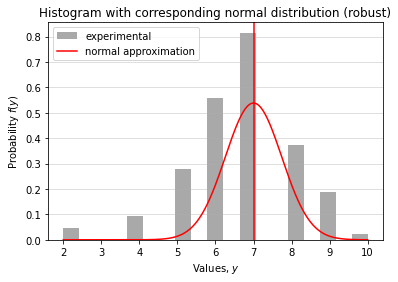

Estimation method: robust
mu =  7.0 , sigma =  0.7412898443291327


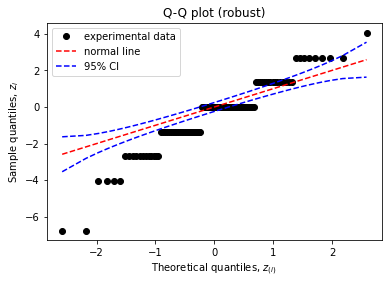

()

In [21]:
Q_Q_Hist(sleep['Hours'])
Q_Q_Plot(sleep['Hours'])


It seams that the data are not normally distributed

<a name='ex-32'></a>
### Check homogeneity of variance (20 pt)

<ul><li>
Use boxplots for the check of homoegeneity of variance. Do you want the full points? Plot with bokeh!</li>

<li>Use a Levene’s & Bartlett’s Test of Equality (Homogeneity) of Variance to test equal variance statistically</li><ul>

In [22]:
# your code for the statistical test here
from scipy import stats
shapiro_test = stats.shapiro(sleep['Hours'])
print('p_value =',  shapiro_test[1])

p_value = 7.15833084541373e-05



The p_value > 0.5 So, we reject the null hypothesis! The data are not normally ditributed

---

<a name='3'></a>
## Part 4: Prepare your data (10 pt)

Create a dataframe with equal samplesize. Make three categories for tireness 1-2 = no, 3 = maybe, 4-5 = yes

In [23]:
#your solution here
boxplotdf = sleep.copy()
boxplotdf['Tired'] = boxplotdf['Tired'].map({1 : 'No',
                                    2 : 'No',
                                    3 : 'Maybe',
                                    4 : 'Yes',
                                    5 : 'Yes'})
boxplotdf.head()


,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast,colors
0,1,8,1,1,Maybe,1,Blue
1,0,6,1,1,Maybe,0,red
2,1,6,1,1,No,1,Blue
3,0,7,1,1,Yes,0,red
4,0,7,1,1,No,1,Blue


In [24]:
class Boxplot:
    """
    class for bokeh boxplot
    input: pandas dataframe with value and group by column
    """
    
    def __init__(self, df, value, by): 
        self.df = df
        self.value = value
        self.by = by
        self.groups = self.df.groupby(by)
        self.q1 = self.groups.quantile(q=0.25)
        self.q2 = self.groups.quantile(q=0.5)
        self.q3 = self.groups.quantile(q=0.75)     
        self.out = []
        self.outx = []
        self.outy = []
        self.qmin = self.groups.quantile(q=0.00)
        self.qmax = self.groups.quantile(q=1.00) 

    
    @property
    def iqr(self):
        return self.q3 - self.q1
    
    @property
    def upper(self):
        return self.q3 + 1.5*self.iqr
    
    @property
    def lower(self):
        return self.q1 - 1.5*self.iqr
    
    def __outliers__(self, g):
        cat = g.name
        g = g[(g[self.value] > self.upper.loc[cat][self.value]) | 
              (g[self.value] < self.lower.loc[cat][self.value])][self.value]
        return g
    
    def get_outliers(self):
        self.out = self.groups.apply(self.__outliers__).dropna()
        if not self.out.empty:
            for keys in self.out.index:
                self.outx.append(keys[0])
                self.outy.append(self.out.loc[keys[0]].loc[keys[1]])

            
    def set_minmax(self):
       #if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
        self.upper[self.value]= [min([x,y]) for (x,y) in zip(list(self.qmax.loc[:,self.value]),self.upper[self.value])]
        self.lower[self.value] = [max([x,y]) for (x,y) in zip(list(self.qmin.loc[:,self.value]),self.lower[self.value])]
                
    def __str__(self):
        return f"q1: {self.q1}\nq3: {self.q3}\niqr: {self.iqr}"
    
    def boxplot(self, segment_color = "black", vfillcolor = "grey", 
             outcolor = "red", height = 400, width = 400):
        self.get_outliers()
        self.set_minmax()
        cats = sorted(self.df[self.by].unique())
        
        p = figure(tools="", 
                   background_fill_color="#efefef", 
                   x_range=cats, 
                   toolbar_location=None,
                   plot_width=width, 
                   plot_height=height, 
                   title = f"boxplot of {self.value} grouped by {self.by}")

        # stems
        p.segment(cats, 
                  self.upper[self.value], 
                  cats, 
                  self.q3[self.value], 
                  line_color=segment_color)
        p.segment(cats, 
                  self.lower[self.value], 
                  cats, 
                  self.q1[self.value], 
                  line_color=segment_color)

        # boxes
        p.vbar(cats, 
               0.7, 
               self.q2[self.value], 
               self.q3[self.value], 
               fill_color=vfillcolor, 
               line_color="black")
        p.vbar(cats, 
               0.7, 
               self.q1[self.value], 
               self.q2[self.value], 
               fill_color=vfillcolor, 
               line_color="black")

        # whiskers (almost-0 height rects simpler than segments)
        p.rect(cats, 
               self.lower[self.value], 
               0.2, 
               0.01, 
               line_color="black")
        p.rect(cats, 
               self.upper[self.value], 
               0.2, 
               0.01, 
               line_color="black")

        # outliers
        if not self.out.empty:
            p.circle(self.outx, self.outy, size=6, color=outcolor, fill_alpha=0.6)

        p.xgrid.grid_line_color = None
        p.ygrid.grid_line_color = "white"
        p.grid.grid_line_width = 2
        p.xaxis.major_label_text_font_size="10px"

        return p

In [25]:
b = Boxplot(df = boxplotdf, 
                   value = 'Hours', by = 'Tired')
p = b.boxplot()
show(p)

C:\Users\STELIOS\AppData\Local\Temp/ipykernel_8080/3919594693.py:12: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  self.q1 = self.groups.quantile(q=0.25)
C:\Users\STELIOS\AppData\Local\Temp/ipykernel_8080/3919594693.py:13: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  self.q2 = self.groups.quantile(q=0.5)
C:\Users\STELIOS\AppData\Local\Temp/ipykernel_8080/3919594693.py:14: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  self.q3 = self.groups.quantile(q=0.75)
C:\Users\STELI

---

<a name='4'></a>
## Part 5: Answer the research questions (20 pt)

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>use one-way ANOVA for research question 1</li>
    <li>Use two-way ANOVA for research question 2</li>
    <li>https://reneshbedre.github.io/blog/anova.html</li>
</ul>
</details>

In [26]:
#Your solution here
import pingouin as pg

aov = pg.anova(dv='Breakfast', between='Hours', data= sleep,
               detailed=True)
aov.round(2)

,Source,SS,DF,MS,F,p-unc,np2
0,Hours,3.04,7,0.43,1.9,0.08,0.12
1,Within,21.48,94,0.23,NaN,NaN,NaN


There is not any differences in Hours of sleep caused by having breakfast (yes, no) since the p_values > 0.05


In [27]:
aov = pg.anova(dv='Hours', between=['Breakfast', 'Tired'], data= sleep,
               detailed=True)
aov.round(2)

,Source,SS,DF,MS,F,p-unc,np2
0,Breakfast,6.68,1.0,6.68,3.50,0.06,0.04
1,Tired,13.00,4.0,3.25,1.70,0.16,0.07
2,Breakfast * Tired,4.11,4.0,1.03,0.54,0.71,0.02
3,Residual,175.53,92.0,1.91,NaN,NaN,NaN


There is not any differences in Hours sleep caused by having breakfast and the tireness since the p_value > 0.05

---

<a name='5'></a>
## Part 6: Enhanced plotting (20 pt)

Create a panel with 1) your dataframe with equal samplesize 2) a picture of a sleeping beauty, 3) the scatter plot of tired / hours of sleep with different colors for Breakfast from part 2 4) the boxplots given the p-value for the anova outcome in the title

In [28]:
df_widget = pn.widgets.DataFrame(sleep.head(), name='DataFrame')

In [29]:
template = pn.template.FastGridTemplate(
    site="Panel", title="Sleep",

)
template.main[1:5, :5] = pn.Row(scatter, sizing_mode="stretch_both")
template.main[1:3, 5:11] = pn.Row(df_widget, sizing_mode="stretch_both")
template.main[5:8, :5] = pn.Row(p, sizing_mode="stretch_both")
template.main[3:8, 5:] = pn.pane.JPG("https://static.wikia.nocookie.net/disney/images/c/c0/PrincessAuroraSleeps.jpg/revision/latest?cb=20210112203040")
template.show()

Launching server at http://localhost:59939
